In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


import numpy as np
import pandas as pd

import datetime as dt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# reflect an existing database into a new model (Ins_Reflection.ipynb)
Base = automap_base()
#reflect tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results(Ins_Dates.ipynb)(Stu_Dates.ipynb)
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [9]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
lastdate = (session.query(Measurement.date)
            .order_by(Measurement.date.desc())
            .first())

In [13]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
reqdate = dt.datetime(2016, 8, 23)
reqdate

datetime.datetime(2016, 8, 23, 0, 0)

In [15]:
session.query(Measurement.date).\
    filter(Measurement.date > '2016-8-23').\
    order_by(Measurement.date).all()

[('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-01'),
 ('2017-01-02'),
 ('2017-01-02'),
 ('2017-01-02'),
 ('2017-01-02'),
 ('2017-01-02'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-03'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-04'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-05'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-06'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-07'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-08'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-09'),
 ('2017-01-10'),
 ('2017-01-10'),
 ('2017-01-10'),
 ('2017-01-10'),
 ('2017-01-10'

In [16]:
# Calculate the date 1 year ago from the last data point in the database (https://stackoverflow.com/questions/8895208/sqlalchemy-how-to-filter-date-field)(https://gist.github.com/danielthiel/8374607)
precipitation = session.query(Measurement.date,Measurement.prcp).\
                    filter(func.strftime("%Y-%m-%d", Measurement.date) >= '2016-08-23').\
                    order_by(Measurement.date).all()
precipitation

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipitation,columns=["date","precipitation"])
precip_df = precip_df.sort_values(by='date', ascending=True)
precip_df.fillna(value=0, inplace=True)

precip_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


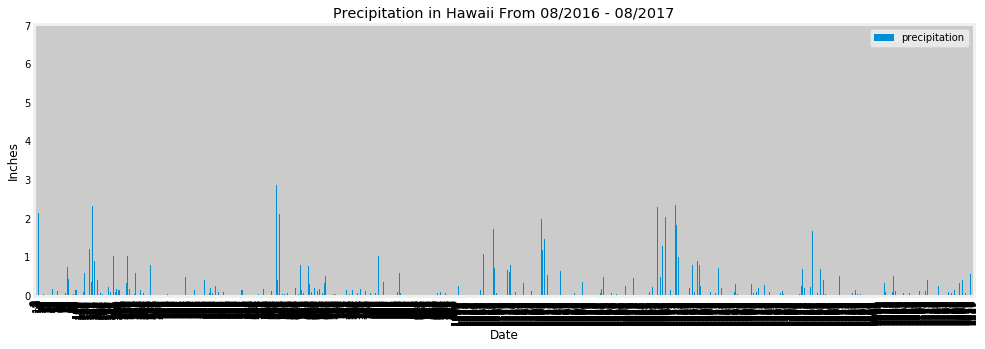

In [18]:
precip_df.plot(kind="bar", figsize=(15,5))

plt.title("Precipitation in Hawaii From 08/2016 - 08/2017")
plt.xlabel("Date")
plt.ylabel("Inches")


plt.show()


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
precip_df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?(Ins_Dates.ipynb)
session.query(Station).count()

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?(Stu_Dates.ipynb)
# List the stations and the counts in descending order.


active_stations_totals = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_stations_totals

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
low_temp = session.query(func.min(Measurement.tobs)).\
filter(Measurement.station == "USC00519397").\
group_by(Measurement.station).all()
print(f"Lowest temp is {low_temp}")

Lowest temp is [(56.0,)]


In [23]:
# highest temperature recorded, and average temperature of the most active station?
high_temp = session.query(func.max(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").\
group_by(Measurement.station).all()
print(f"Highest temp is {high_temp}")

Highest temp is [(85.0,)]


In [24]:
avg_temp = session.query(func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").\
group_by(Measurement.station).all()
print(f"Average temp is {avg_temp}")

Average temp is [(71.66378066378067,)]


In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Station_281 = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == "USC00519281").\
filter(func.strftime("%Y-%m-%d", Measurement.date) >= '2016-08-23').all()

Station_281


[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [36]:
# Save the query results as a Pandas DataFrame 
station_df = pd.DataFrame(Station_281,columns=["date","temperature"])
station_df = station_df.sort_values(by='date', ascending=True)

station_df

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


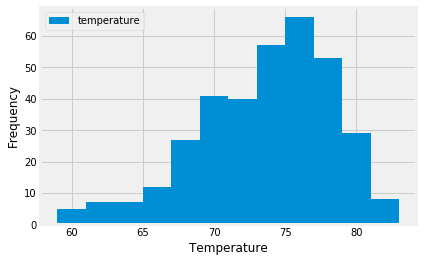

In [40]:
station_df.plot(kind="hist",bins=12);
plt.xlabel('Temperature')

plt.show()